<a href="https://colab.research.google.com/github/neamagalal/machine/blob/main/sklearn_and_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1)Prepare Problem**

**Load libraries**

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from pandas.core.common import flatten
from keras.layers import Dense, Activation, Flatten

**Load dataset**

In [ ]:
dataset = read_csv('/content/audiobook_data_2.csv' )

# **2)Summarize Data**

**Descriptive statistics**

In [ ]:
dataset.head()

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [ ]:
dataset.shape

(14084, 12)

In [ ]:
dataset.describe()

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,189.888983,0.070222,61.935033,0.158833
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,371.084010,0.472157,88.207634,0.365533
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               14084 non-null  int64  
 1   Book_length(mins)_overall        14084 non-null  float64
 2   Book_length(mins)_avg            14084 non-null  int64  
 3   Price_overall                    14084 non-null  float64
 4   Price_avg                        14084 non-null  float64
 5   Review                           14084 non-null  int64  
 6   Review10/10                      14084 non-null  float64
 7   Completion                       14084 non-null  float64
 8   Minutes_listened                 14084 non-null  float64
 9   Support_Request                  14084 non-null  int64  
 10  Last_Visited_mins_Purchase_date  14084 non-null  int64  
 11  Target                           14084 non-null  int64  
dtypes: float64(6), int

In [ ]:
dataset.groupby(dataset.iloc[:, 11]).size()

Target
0    11847
1     2237
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
#check missing value
dataset.isnull().sum()

ID                                 0
Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

**Data Visualization**


univariant

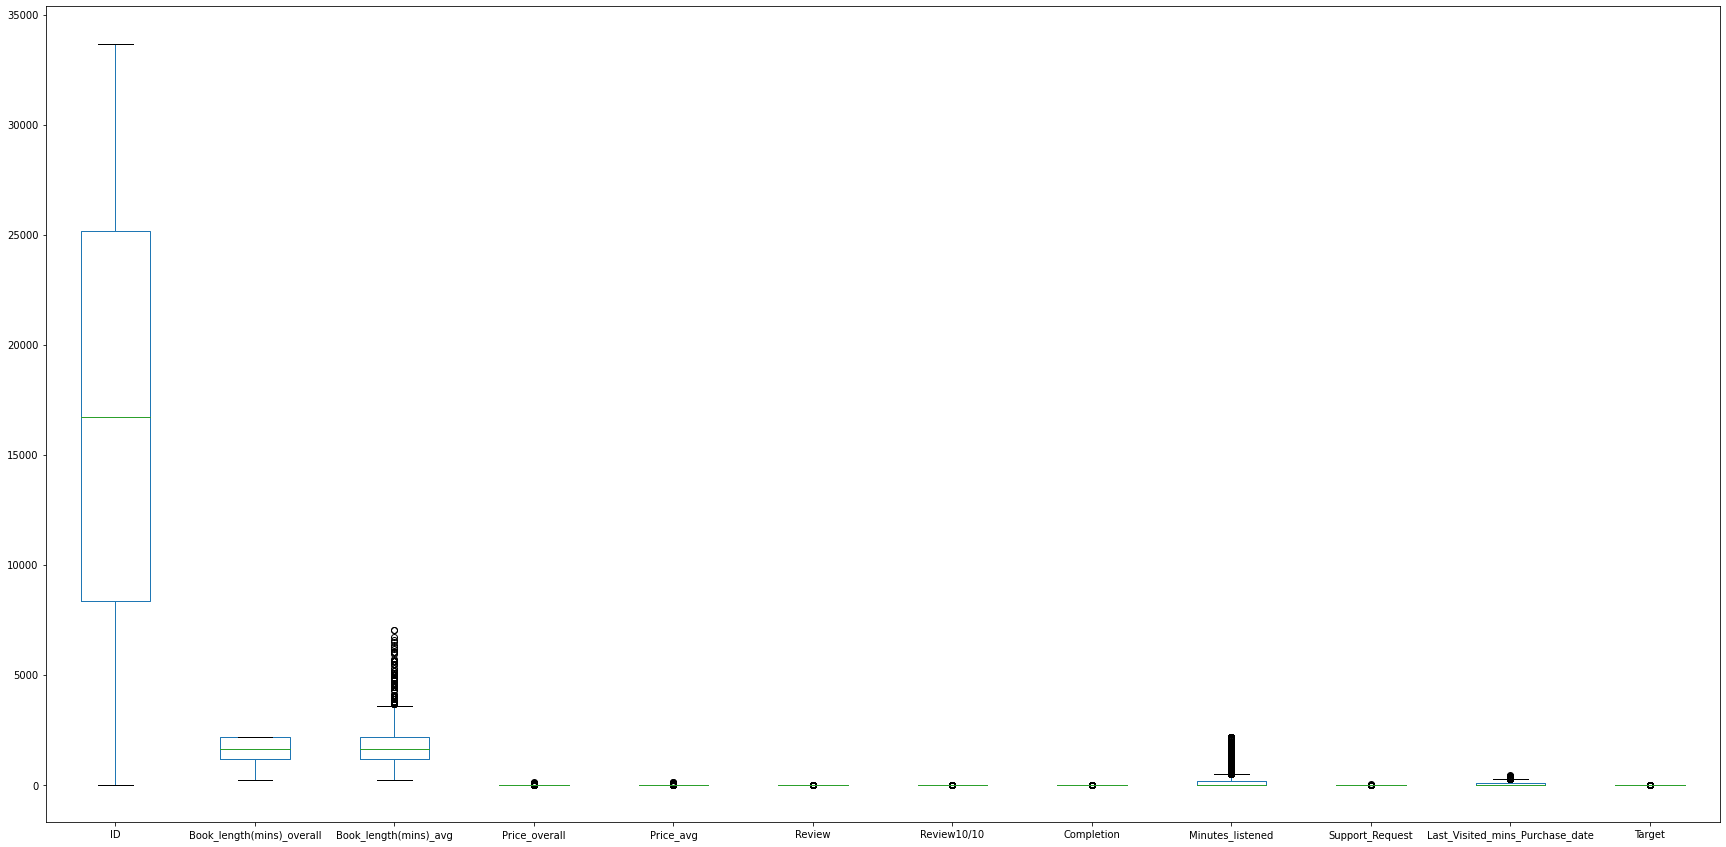

In [ ]:
dataset.plot(kind='box',figsize=(30,15))
pyplot.show()

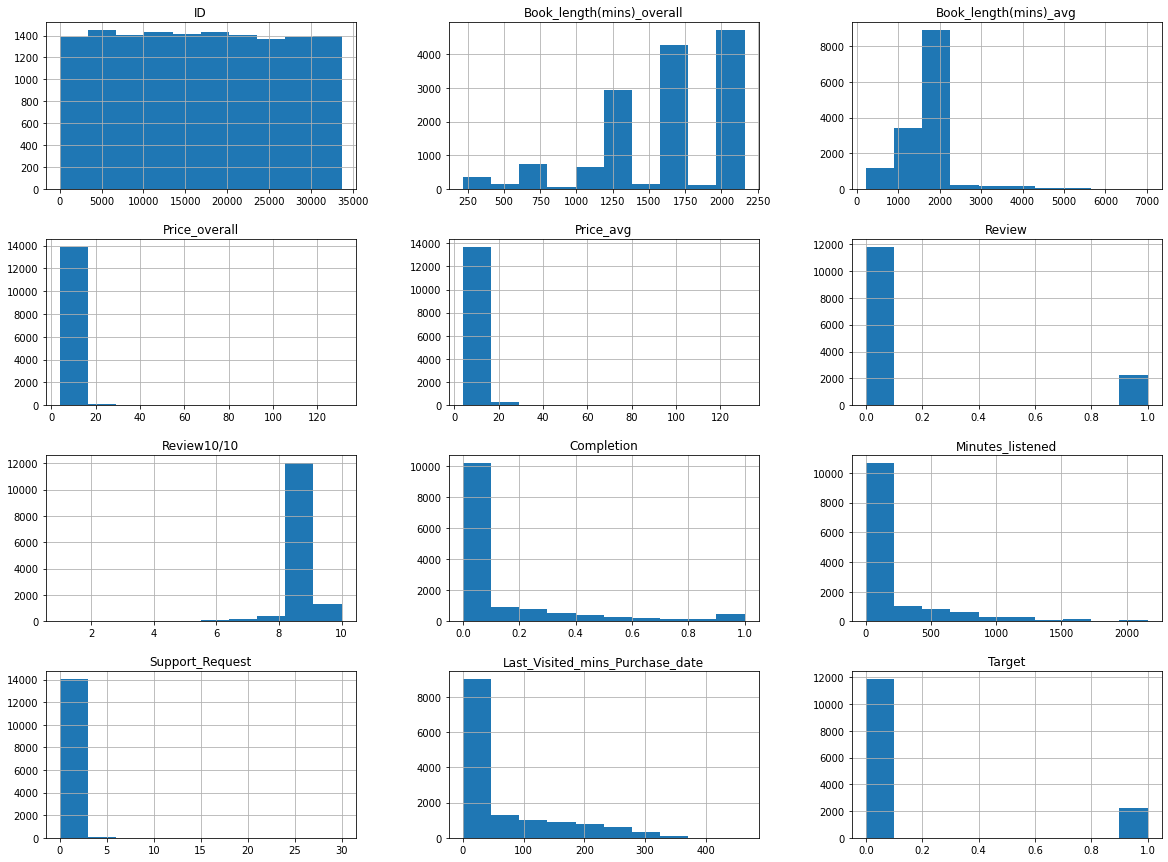

In [ ]:
dataset.hist(figsize=(20,15))
pyplot.show()

Multivariate PLOT

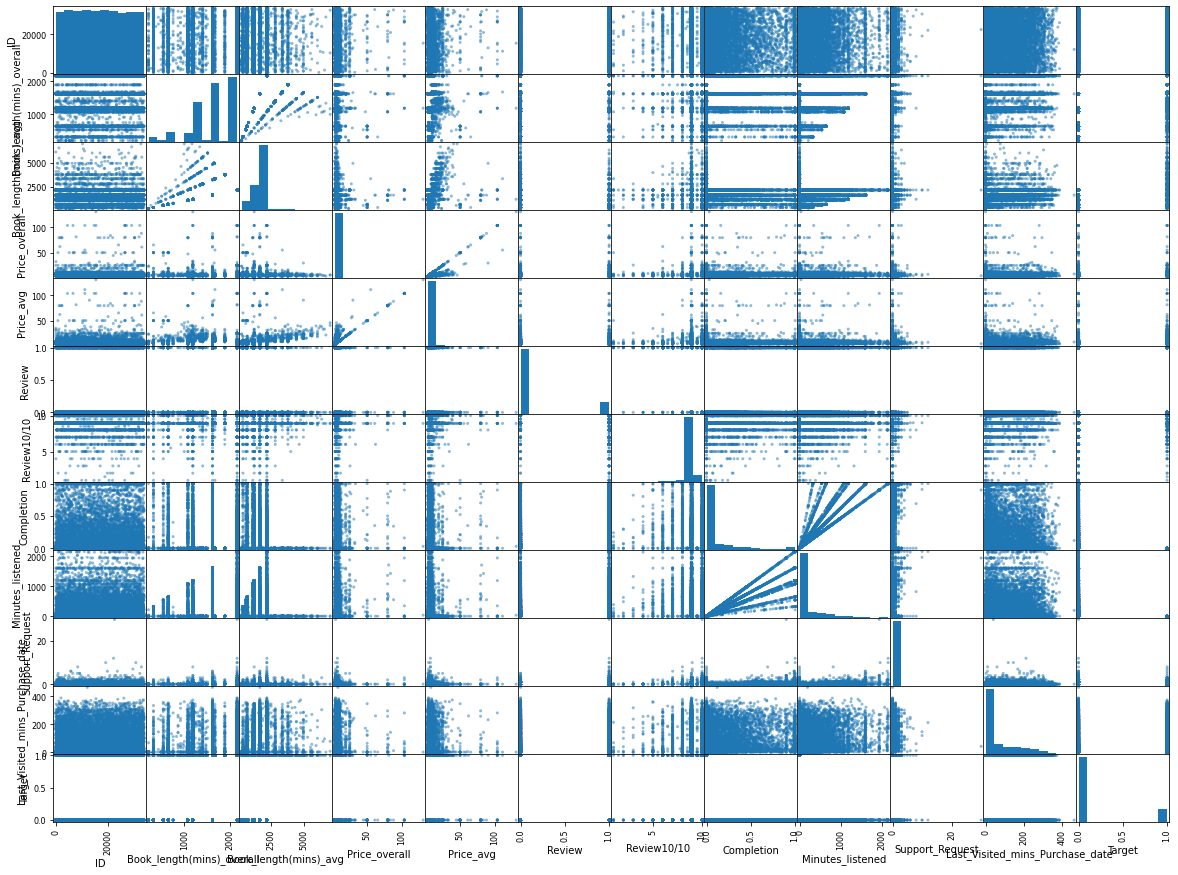

In [ ]:
scatter_matrix(dataset,figsize=(20,15))
pyplot.show()

# **3)Prepare Data**

**Data Cleaning**

In [ ]:
#Log Transformation for skew outliers
dataset[['Book_length(mins)_avg','Price_avg','Price_overall']]=np.log(dataset[['Book_length(mins)_avg','Price_avg','Price_overall']])

In [ ]:
dataset.head()

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,994,1620.0,7.390181,2.982140,2.982140,1,10.00,0.99,1603.8,5,92,0
1,1143,2160.0,7.677864,1.673351,1.673351,0,8.91,0.00,0.0,0,0,0
2,2059,2160.0,7.677864,1.673351,1.673351,0,8.91,0.00,0.0,0,388,0
3,2882,1620.0,7.390181,1.785070,1.785070,0,8.91,0.42,680.4,1,129,0
4,3342,2160.0,7.677864,1.673351,1.673351,0,8.91,0.22,475.2,0,361,0


In [ ]:
#feature scaling
#col2,8 has outliers
dataset[['Minutes_listened','Last_Visited_mins_Purchase_date','Book_length(mins)_avg']] = StandardScaler().fit_transform(dataset[['Minutes_listened','Last_Visited_mins_Purchase_date','Book_length(mins)_avg']])



In [ ]:
dataset.head()

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,994,1620.0,0.111146,2.982140,2.982140,1,10.00,0.99,3.810353,5,0.340855,0
1,1143,2160.0,0.755202,1.673351,1.673351,0,8.91,0.00,-0.511732,0,-0.702175,0
2,2059,2160.0,0.755202,1.673351,1.673351,0,8.91,0.00,-0.511732,0,3.696693,0
3,2882,1620.0,0.111146,1.785070,1.785070,0,8.91,0.42,1.321880,1,0.760335,0
4,3342,2160.0,0.755202,1.673351,1.673351,0,8.91,0.22,0.768886,0,3.390586,0


In [ ]:
#normalize
dataset[['Book_length(mins)_overall']] = (dataset[['Book_length(mins)_overall']] - dataset[['Book_length(mins)_overall']].min()) / (dataset[['Book_length(mins)_overall']].max() - dataset[['Book_length(mins)_overall']].min())    
  

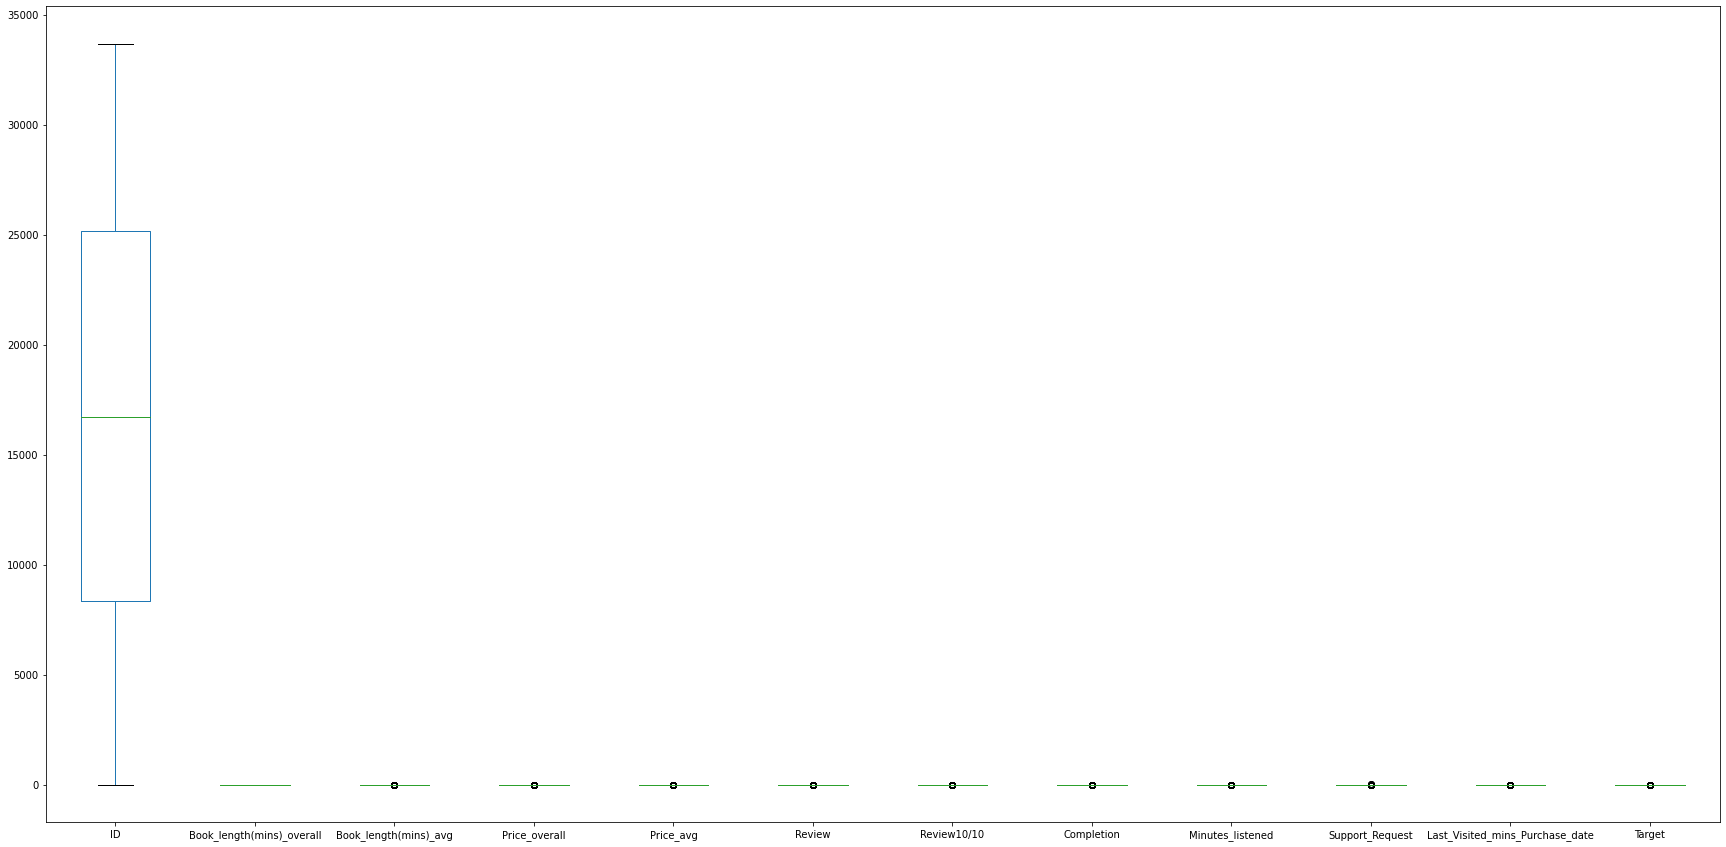

In [ ]:
dataset.plot(kind='box',figsize=(30,15))
pyplot.show()

In [ ]:
dataset=dataset.drop(['ID'],axis=1)
dataset.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
0,0.722222,0.111146,2.982140,2.982140,1,10.00,0.99,3.810353,5,0.340855,0
1,1.000000,0.755202,1.673351,1.673351,0,8.91,0.00,-0.511732,0,-0.702175,0
2,1.000000,0.755202,1.673351,1.673351,0,8.91,0.00,-0.511732,0,3.696693,0
3,0.722222,0.111146,1.785070,1.785070,0,8.91,0.42,1.321880,1,0.760335,0
4,1.000000,0.755202,1.673351,1.673351,0,8.91,0.22,0.768886,0,3.390586,0


In [ ]:
X=dataset.iloc[: , :-1]
y= dataset.iloc[: , -1]
#imbalance data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='auto', random_state=42)
X, y = smt.fit_resample(X, y)

In [ ]:
counter = Counter(y)
print(counter)

Counter({0: 8801, 1: 8029})


# **4)Evaluate Algorithms**

 **Split-out validation dataset**

In [ ]:
# split into train test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.33,random_state=42)
# split the data in training and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, train_size=0.7, random_state=42)


**build model**

In [ ]:
model = Sequential()
model.add(Flatten(input_dim=10))
model.add(Dense(25, activation='relu',name="hidden_layer1"))
model.add(Dense(8, activation='relu',name="hidden_layer2"))
model.add(Dense(1, activation='sigmoid',name="output_layer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 hidden_layer1 (Dense)       (None, 25)                275       
                                                                 
 hidden_layer2 (Dense)       (None, 8)                 208       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 492
Trainable params: 492
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#where parameters are set for model training and predictions.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Model fit and Evaluation**

In [ ]:
history=model.fit(X_train, y_train, epochs=50, shuffle=True, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
247/247 [==============================] - 1s 3ms/step - loss: 0.5491 - accuracy: 0.8032 - val_loss: 0.4092 - val_accuracy: 0.8750
Epoch 2/50
247/247 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8739 - val_loss: 0.2703 - val_accuracy: 0.9075
Epoch 3/50
247/247 [==============================] - 1s 2ms/step - loss: 0.2664 - accuracy: 0.8961 - val_loss: 0.2354 - val_accuracy: 0.9075
Epoch 4/50
247/247 [==============================] - 1s 2ms/step - loss: 0.2379 - accuracy: 0.9049 - val_loss: 0.2147 - val_accuracy: 0.9220
Epoch 5/50
247/247 [==============================] - 1s 2ms/step - loss: 0.2214 - accuracy: 0.9128 - val_loss: 0.1911 - val_accuracy: 0.9285
Epoch 6/50
247/247 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.9173 - val_loss: 0.1891 - val_accuracy: 0.9329
Epoch 7/50
247/247 [==============================] - 1s 2ms/step - loss: 0.2044 - accuracy: 0.9207 - val_loss: 0.1790 - val_accuracy: 0.9379
Epoch 

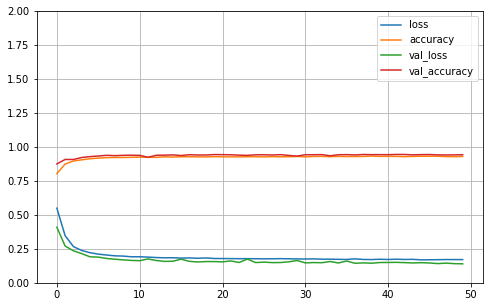

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [ ]:
accuracy = model.evaluate(X_test, y_test)

print(accuracy)

174/174 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9355
[0.16028258204460144, 0.9355419278144836]
